In [26]:
import pandas as pd # shortens the name by using alias 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

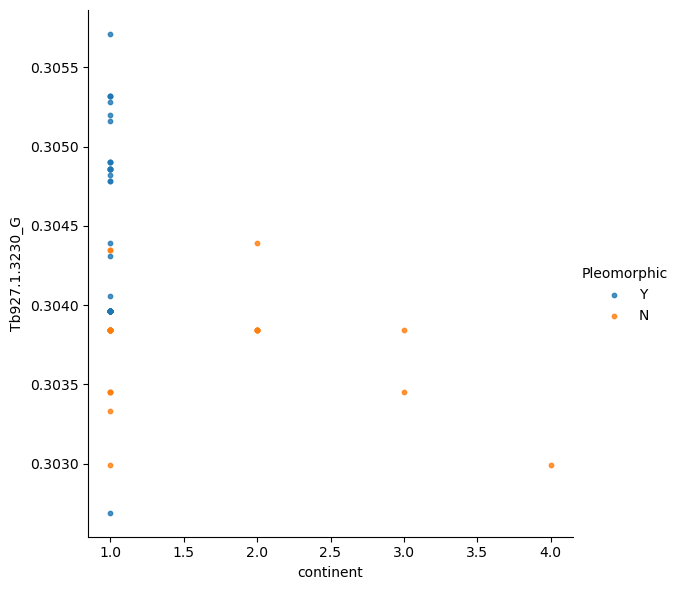

In [60]:
# open the data file
df = pd.read_csv('/Users/goldriev/mono-trac/ml/ml_input.csv', sep=",", na_values=['-'])

# convert column names to lower case
#df.columns = [c.lower() for c in df.columns]


# filter to exclude very small/large genomes and very low GC content
# this data file is full of artefacts that we don't belive
#df = df[(df['gc%'] > 20) & (df['size (mb)'] < 5000) & (df['size (mb)'] > 10)]

#df = df[['size (mb)', 'gc%', 'genes', 'group', 'subgroup']].dropna()
# show the first few lines
df.head()

sns.lmplot(
data=df,
#    data=data[data['group'] == 'Animals'],
x='continent',
y='Tb927.1.3230_G',
scatter_kws={"s": 10},
height=6,
hue='Pleomorphic',
fit_reg=False)

In [61]:
df.head()

isolate      Subspecies                 Type     Subgenus Pleomorphic  \
0         108AT  T.b. gambiense        T.b.gambiense  Trypanozoon           Y   
1         108BT  T.b. gambiense        T.b.gambiense  Trypanozoon           Y   
2  15BT-relapse  T.b. gambiense        T.b.gambiense  Trypanozoon           Y   
3        280104      T.b.evansi  T. b. evansi type A  Trypanozoon           N   
4         340AT  T.b. gambiense        T.b.gambiense  Trypanozoon           Y   

                            country  continent  Tb927.1.3230_T  \
0  Democratic Republic of the Congo        1.0         0.22984   
1  Democratic Republic of the Congo        1.0         0.22984   
2  Democratic Republic of the Congo        1.0         0.22984   
3                         Indonesia        2.0         0.22987   
4  Democratic Republic of the Congo        1.0         0.22984   

   Tb927.1.3230_C  Tb927.1.3230_A  ...  Tb927.8.3480_A  Tb927.8.3480_G  \
0         0.25455         0.21166  ...         0.24781         0.28673   
1         0.25455         0.21166  ...         0.24781         0.28673   
2         0.25455         0.21166  ...         0.24781         0.28673   
3         0.25421         0.21208  ...         0.24822         0.28720   
4         0.25455         0.21166  ...         0.24781         0.28673   

   Tb927.8.3810_T  Tb927.8.3810_C  Tb927.8.3810_A  Tb927.8.3810_G  \
0          0.2094         0.25385         0.24103         0.29573   
1          0.2094         0.25385         0.24103         0.29573   
2          0.2094         0.25385         0.24103         0.29573   
3          0.2094         0.25385         0.24103         0.29573   
4          0.2094         0.25385         0.24103         0.29573   

   Tb927.9.10660_T  Tb927.9.10660_C  Tb927.9.10660_A  Tb927.9.10660_G  
0          0.26476          0.21333          0.24762          0.27429  
1          0.26476          0.21333          0.24762          0.27429  
2          0.26476          0.21333          0.24762          0.27429  
3          0.26286          0.21333          0.24952          0.27429  
4          0.26476          0.21333          0.24762          0.27429  

[5 rows x 83 columns]

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# scale size,gc,genes to be between 0 and 1
df[['size (mb)', 'gc%', 'genes']] = scaler.fit_transform(df[['size (mb)', 'gc%', 'genes']])
df.columns = ['size', 'gc', 'genes', 'group', 'subgroup']
df.head()

KeyError: "None of [Index(['size (mb)', 'gc%', 'genes'], dtype='object')] are in the [columns]"

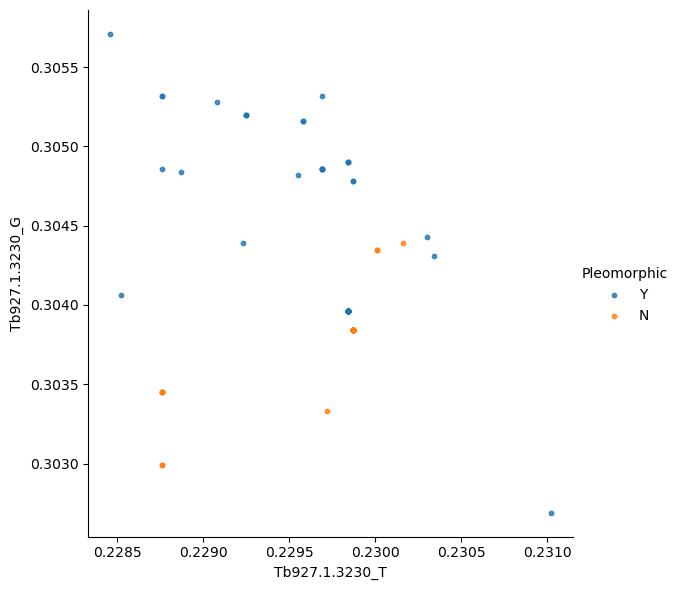

In [ ]:
# select just bird, fish and mammal genomes
#my_species = df[df['subgroup'].isin(['Birds', 'Fishes', 'Mammals'])]

# look at genome size VS gc for birds/fishes/mammals
sns.lmplot(
data=df,
#    data=data[data['group'] == 'Animals'],
x='Tb927.1.3230_T',
y='Tb927.1.3230_G',
scatter_kws={"s": 10},
height=6,
hue='Pleomorphic',
fit_reg=False)

In [ ]:
from sklearn import neighbors

# these are the data that the knn classifier will see
# the first two will be the input vector, the last will be the category it is trying to predict
df[['Tb927.1.3230_T', 'Tb927.1.3230_C', 'Pleomorphic']]


Tb927.1.3230_T  Tb927.1.3230_C Pleomorphic
0          0.22984         0.25455           Y
1          0.22984         0.25455           Y
2          0.22984         0.25455           Y
3          0.22987         0.25421           N
4          0.22984         0.25455           Y
..             ...             ...         ...
78         0.22876         0.25444           Y
79         0.22987         0.25421           N
80         0.22876         0.25584           N
81         0.22876         0.25444           Y
82         0.22987         0.25421           N

[83 rows x 3 columns]

In [ ]:
# create a KNN classifier with 10 neighbours
clf = neighbors.KNeighborsClassifier(10)

# train it on the features and the categories
clf.fit(
    df[['Tb927.1.3230_T', 'Tb927.1.3230_C']], # these are the columns the classifier will see
    df['Pleomorphic']            # this is the column it will try to predict
)

# now we can ask it to predict the subgroup of a made up new genome
# with a genome size of 1000 mb and gc percentage of 45
clf.predict([[0.22987,0.25421]])

/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['N'], dtype=object)

In [ ]:
# we can also see what it thinks the probability of each class is

# print the classes so we know what order it has them in
print(clf.classes_)

# now get the predictions
print(clf.predict_proba([[0.365, 0.45]]))

['N' 'Y']
[[0.7 0.3]]


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# how well does it predict the classes of the training set?
clf.score(
    df[['Tb927.1.3230_T', 'Tb927.1.3230_C']], # these are the columns the classifier will see
    df['Pleomorphic']            # this is the column it will try to predict
)

0.8795180722891566

In [ ]:
# very well! but this is cheating - it has already seen the data.
# what we should do is split our data into a training and a test set

from sklearn.model_selection import train_test_split

features = df[['Tb927.1.3230_T', 'Tb927.1.3230_C']]
classes  = df['Pleomorphic']

classes

0     Y
1     Y
2     Y
3     N
4     Y
     ..
78    Y
79    N
80    N
81    Y
82    N
Name: Pleomorphic, Length: 83, dtype: object

In [ ]:
# split the features and classes into 80% training, 20% test
training_features, test_features, training_classes, test_classes = train_test_split(features, classes, test_size=0.2)

len(training_features), len(test_features)

(66, 17)

In [ ]:
# build a classifier with the training data
clf = neighbors.KNeighborsClassifier(10)
clf.fit(training_features, training_classes)

# use it to predict the classes of the test data
print(clf.predict(test_features))

['N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N']


In [ ]:
# how often did it get it right?
clf.score(test_features, test_classes)

0.8823529411764706

/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/gol

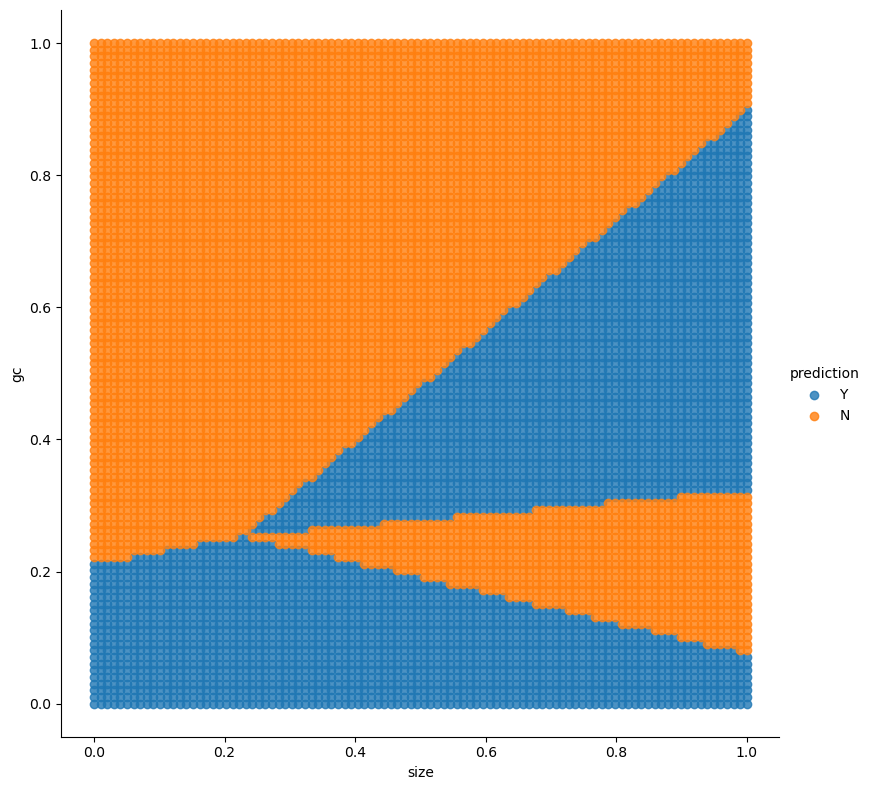

In [ ]:
# we can visualize the behaviour by seeing how it would classify each point in a grid
import numpy as np

clf = neighbors.KNeighborsClassifier(10)
clf.fit(training_features, training_classes)

rows = []
for size in np.linspace(0, 1, 100):
    for gc in np.linspace(0, 1, 100):
        rows.append({'size' : size, 'gc' : gc, 'prediction' : clf.predict([[size, gc]])[0]})
        #print({'size' : size, 'gc' : gc, 'prediction' : clf.predict([[size, gc]])[0]})
mesh =pd.DataFrame(rows, columns=['size', 'gc', 'prediction'])

sns.lmplot(
data =mesh,
x='size',
y='gc',
hue='prediction',
height=8,
fit_reg=False)

In [ ]:
# we have much more data

features = df[['Tb927.1.3230_T', 'Tb927.1.3230_C']]
classes  = df['Pleomorphic']

training_features, test_features, training_classes, test_classes = train_test_split(features, classes, test_size=0.2)

len(training_features), len(test_classes)

(66, 17)

In [ ]:
# build and test the classifier
clf = neighbors.KNeighborsClassifier(10)
clf.fit(training_features, training_classes)

# much worse!
clf.score(test_features, test_classes)

0.7647058823529411

/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/gol

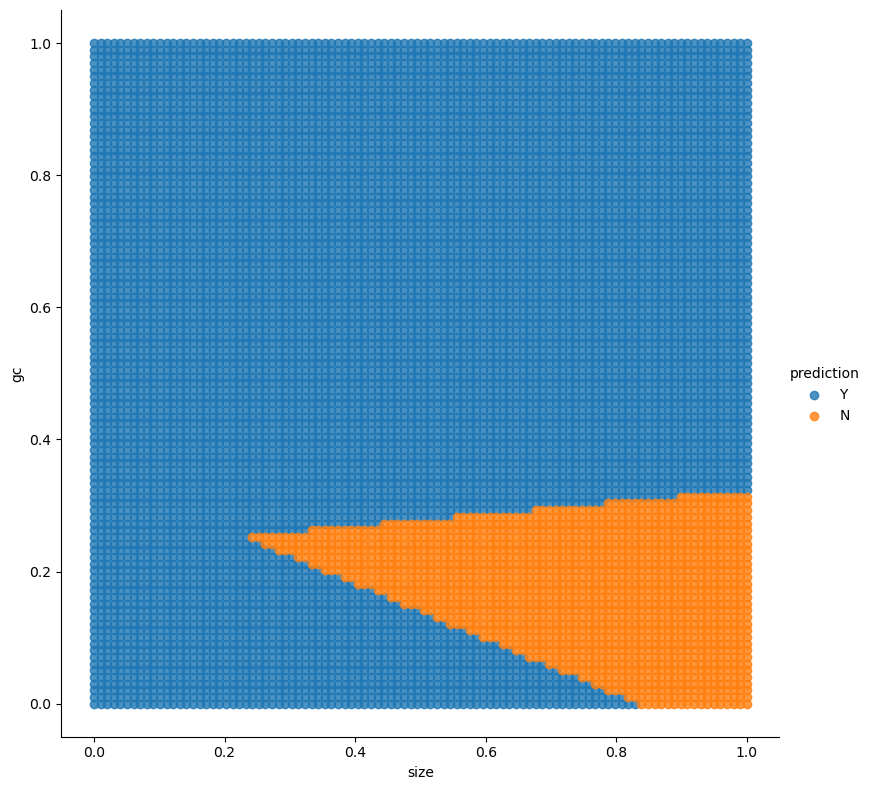

In [ ]:
rows = []
for size in np.linspace(0, 1, 100):
    for gc in np.linspace(0, 1, 100):
        rows.append({'size' : size, 'gc' : gc, 'prediction' : clf.predict([[size, gc]])[0]})
        #print({'size' : size, 'gc' : gc, 'prediction' : clf.predict([[size, gc]])[0]})
mesh =pd.DataFrame(rows, columns=['size', 'gc', 'prediction'])

sns.lmplot(
data =mesh,
x='size',
y='gc',
hue='prediction',
height=8,
fit_reg=False)

In [ ]:
# maybe we can do better with more/fewer neighbours

# what is the best value for k?

for k in range(1,20,2):
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(training_features, training_classes)
    print(k, clf.score(test_features, test_classes))

1 0.8823529411764706
3 0.8235294117647058
5 0.9411764705882353
7 0.7647058823529411
9 0.7647058823529411
11 0.7647058823529411
13 0.7058823529411765
15 0.7058823529411765
17 0.7058823529411765
19 0.7058823529411765


In [ ]:
# problem: maybe this is specific to the random training set?
# see what happens if we repeat a bunch of times....
# lots of variation just due to random split
for _ in range(10):
    training_features, test_features, training_classes, test_classes = train_test_split(features, classes, test_size=0.2)
    clf = neighbors.KNeighborsClassifier(3)
    clf.fit(training_features, training_classes)
    print(clf.score(test_features, test_classes))

0.7058823529411765
0.9411764705882353
0.9411764705882353
0.7058823529411765
0.8823529411764706
1.0
0.8823529411764706
0.8823529411764706
0.8823529411764706
0.8823529411764706


In [ ]:
# the solution: cross-validation...

from sklearn.model_selection import cross_val_score
clf = neighbors.KNeighborsClassifier(10)
cross_val_score(clf, features, classes, cv=10)

array([1.        , 0.88888889, 0.88888889, 0.875     , 0.75      ,
       0.875     , 0.875     , 0.75      , 1.        , 1.        ])

In [ ]:
# cross-validate for different values of k

for k in range(1,20):
    clf = neighbors.KNeighborsClassifier(k)
    print(k, cross_val_score(clf, features, classes, cv=10).mean())

1 0.9375
2 0.9
3 0.9
4 0.8638888888888889
5 0.9013888888888889
6 0.8902777777777778
7 0.8902777777777778
8 0.8777777777777779
9 0.8777777777777779
10 0.8902777777777778
11 0.8416666666666666
12 0.8527777777777779
13 0.8180555555555555
14 0.8180555555555555
15 0.8180555555555555
16 0.8055555555555556
17 0.8055555555555556
18 0.8055555555555556
19 0.8055555555555556


In [ ]:
# maybe we can do better if we include another dimension
features = df[['Tb927.1.3230_T',	'Tb927.1.3230_C',	'Tb927.1.3230_A',	'Tb927.1.3230_G']]
classes  = df['Pleomorphic']

for k in range(1,20):
    clf = neighbors.KNeighborsClassifier(k)
    print(k, cross_val_score(clf, features, classes, cv=10).mean())

1 0.9625
2 0.9125
3 0.9125
4 0.9125
5 0.925
6 0.9375
7 0.9375
8 0.9375
9 0.95
10 0.9625
11 0.925
12 0.925
13 0.8902777777777778
14 0.8777777777777779
15 0.8777777777777779
16 0.8777777777777779
17 0.8777777777777779
18 0.8777777777777779
19 0.8777777777777779


In [ ]:
# trying a different classifier is easy as they all share the same interface
from sklearn import tree


features = df[['Tb927.1.3230_T',	'Tb927.1.3230_C',	'Tb927.1.3230_A',	'Tb927.1.3230_G']]
classes  = df['Pleomorphic']

clf = tree.DecisionTreeClassifier()
cross_val_score(clf, features, classes, cv=10).mean()

0.9402777777777779

In [ ]:
# build a classifier with the training data
clf = tree.DecisionTreeClassifier()
clf.fit(training_features, training_classes)

# use it to predict the classes of the test data
print(clf.predict(test_features))

clf.score(test_features, test_classes)

['Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y']


0.8823529411764706

In [34]:
# especially for Carolien: random forrests

from sklearn.ensemble import RandomForestClassifier

features = df.iloc[:, 6:]  # Select every column from the 7th onwards (0-based index)
classes  = df['Pleomorphic']

clf = RandomForestClassifier()

In [41]:
# Check for NA values in the dataframe
print(df.isna().sum())

# Drop rows with NA values
df_cleaned = df.dropna()

# Verify that there are no more NA values
print(df_cleaned.isna().sum())

# Update the features and classes variables
features = df_cleaned.iloc[:, 6:]  # Select every column from the 7th onwards (0-based index)
classes = df_cleaned['Pleomorphic']
training_features, test_features, training_classes, test_classes = train_test_split(features, classes, test_size=0.2)


isolate            0
Subspecies         0
Type               0
Subgenus           0
Pleomorphic        0
                  ..
Tb927.8.3810_G     0
Tb927.9.10660_T    0
Tb927.9.10660_C    0
Tb927.9.10660_A    0
Tb927.9.10660_G    0
Length: 83, dtype: int64
isolate            0
Subspecies         0
Type               0
Subgenus           0
Pleomorphic        0
                  ..
Tb927.8.3810_G     0
Tb927.9.10660_T    0
Tb927.9.10660_C    0
Tb927.9.10660_A    0
Tb927.9.10660_G    0
Length: 83, dtype: int64


In [58]:
cross_val_score(clf, features, classes, cv=10).mean()


0.9857142857142858

In [59]:
clf.fit(features, classes)

RandomForestClassifier()

In [55]:
print(clf.classes_)
print(clf.predict([[3, 0.23604,0.26475,0.22488,0.27113,0.25772,0.22857,0.23579,0.27763,0.25,0.26326,0.21212,0.27273,0.24126,0.20972,0.2532,0.29582,0.24654,0.23453,0.22345,0.29548,0.27455,0.23799,0.23297,0.25376,0.19929,0.2529,0.21805,0.32976,0.23899,0.27673,0.20503,0.27799,0.28279,0.20698,0.213,0.29603,0.21182,0.22998,0.25419,0.30354,0.28924,0.2575,0.20282,0.25044,0.25625,0.22312,0.23394,0.286,0.24663,0.23121,0.27103,0.2492,0.22727,0.25833,0.23258,0.27955,0.29532,0.21491,0.1886,0.29971,0.25762,0.22026,0.235,0.28712,0.24473,0.23785,0.22882,0.2886,0.27257,0.24051,0.18987,0.29705,0.24849,0.24193,0.22167,0.28517]]))
print(clf.predict_proba([[3, 0.23604,0.26475,0.22488,0.27113,0.25772,0.22857,0.23579,0.27763,0.25,0.26326,0.21212,0.27273,0.24126,0.20972,0.2532,0.29582,0.24654,0.23453,0.22345,0.29548,0.27455,0.23799,0.23297,0.25376,0.19929,0.2529,0.21805,0.32976,0.23899,0.27673,0.20503,0.27799,0.28279,0.20698,0.213,0.29603,0.21182,0.22998,0.25419,0.30354,0.28924,0.2575,0.20282,0.25044,0.25625,0.22312,0.23394,0.286,0.24663,0.23121,0.27103,0.2492,0.22727,0.25833,0.23258,0.27955,0.29532,0.21491,0.1886,0.29971,0.25762,0.22026,0.235,0.28712,0.24473,0.23785,0.22882,0.2886,0.27257,0.24051,0.18987,0.29705,0.24849,0.24193,0.22167,0.28517]]))

['N' 'Y']
['Y']
[[0.44 0.56]]


/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/goldriev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
